<a href="https://colab.research.google.com/github/mjahanshahi/intermediate-nlp/blob/master/embeddings/Extracting_Insights_from_Text_Data_Using_NLP_and_Word_Embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Extracting Insights from Text Data Using NLP and Word Embeddings

## Generating Embeddings

### Preprocessing the Corpus

In [1]:
import gensim 
from gensim.test.utils import datapath
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import logging
logging.basicConfig(level=logging.INFO)

In [2]:
DATASET_LINK = "https://raw.githubusercontent.com/AFAgarap/ecommerce-reviews-analysis/master/Womens%20Clothing%20E-Commerce%20Reviews.csv"
df = pd.read_csv(DATASET_LINK, index_col = 0, usecols=["Clothing ID", "Title", "Review Text", "Rating"])
df.shape

(23486, 3)

In [3]:
df.head()

,Title,Review Text,Rating
Clothing ID,,,
767,NaN,Absolutely wonderful - silky and sexy and comf...,4
1080,NaN,Love this dress! it's sooo pretty. i happene...,5
1077,Some major design flaws,I had such high hopes for this dress and reall...,3
1049,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5
847,Flattering shirt,This shirt is very flattering to all due to th...,5


In [4]:
# Lets remove any review without a text review or a rating
df.dropna(how = "any", subset=['Title', 'Review Text', 'Rating'], inplace=True)
df.reset_index(drop=True, inplace=True)
df.shape

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


(19675, 3)

In [5]:
tokenized_docs = []
for document in df["Review Text"].to_list():
  tokenized_doc = list(gensim.utils.tokenize(document, lowercase=True, deacc=True))
  tokenized_docs.append(tokenized_doc)
#TODO: Replace with an iterator

### Training Two Word Embeddings Models

In [6]:
model_50d = gensim.models.Word2Vec(tokenized_docs, size=50, workers=4, sg=1)
model_50d.train(tokenized_docs, total_examples=df.shape[0], epochs=10)

model_200d = gensim.models.Word2Vec(tokenized_docs, size=200, workers=4, sg=1)
model_200d.train(tokenized_docs, total_examples=df.shape[0], epochs=10)

INFO:gensim.models.word2vec:collecting all words and their counts
INFO:gensim.models.word2vec:PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO:gensim.models.word2vec:PROGRESS: at sentence #10000, processed 622075 words, keeping 9767 word types
INFO:gensim.models.word2vec:collected 13076 word types from a corpus of 1233355 raw words and 19675 sentences
INFO:gensim.models.word2vec:Loading a fresh vocabulary
INFO:gensim.models.word2vec:effective_min_count=5 retains 4600 unique words (35% of original 13076, drops 8476)
INFO:gensim.models.word2vec:effective_min_count=5 leaves 1219795 word corpus (98% of original 1233355, drops 13560)
INFO:gensim.models.word2vec:deleting the raw counts dictionary of 13076 items
INFO:gensim.models.word2vec:sample=0.001 downsamples 59 most-common words
INFO:gensim.models.word2vec:downsampling leaves estimated 817424 word corpus (67.0% of prior 1219795)
INFO:gensim.models.base_any2vec:estimated required memory for 4600 words and 50 dimensi

(8174606, 12333550)

### Exploring the Embeddings

In [7]:
model_200d.wv.most_similar("yellow")

INFO:gensim.models.keyedvectors:precomputing L2-norms of word weight vectors


[('salmon', 0.647405207157135),
 ('orange', 0.6459856033325195),
 ('reddish', 0.6283942461013794),
 ('greenish', 0.6253519654273987),
 ('emerald', 0.6251757740974426),
 ('lemon', 0.6116132736206055),
 ('muddy', 0.6096446514129639),
 ('oatmeal', 0.6091336011886597),
 ('pink', 0.6060402989387512),
 ('dusty', 0.6021883487701416)]

In [8]:
model_50d.wv.most_similar("yellow")

INFO:gensim.models.keyedvectors:precomputing L2-norms of word weight vectors


[('blue', 0.8966744542121887),
 ('red', 0.8912047147750854),
 ('purple', 0.8897778391838074),
 ('orange', 0.8885653018951416),
 ('pink', 0.879346489906311),
 ('green', 0.8563825488090515),
 ('salmon', 0.8562541604042053),
 ('mustard', 0.8433877825737),
 ('coral', 0.8428815603256226),
 ('teal', 0.8421884775161743)]

In [9]:
model_200d.wv.most_similar("flattering")

[('flatteringly', 0.5261940956115723),
 ('complimentary', 0.5252902507781982),
 ('forgiving', 0.5144326686859131),
 ('versitile', 0.510459303855896),
 ('slimming', 0.4922451376914978),
 ('attractive', 0.48969918489456177),
 ('falttering', 0.47515732049942017),
 ('flatering', 0.47506508231163025),
 ('supportive', 0.4725635349750519),
 ('tush', 0.4571356475353241)]

In [10]:
model_50d.wv.most_similar("flattering")

[('forgiving', 0.8148477077484131),
 ('slimming', 0.7941778302192688),
 ('comfortable', 0.7535922527313232),
 ('universally', 0.7269968390464783),
 ('attractive', 0.7262656688690186),
 ('floaty', 0.7164795994758606),
 ('flatering', 0.708871066570282),
 ('flatteringly', 0.7085422277450562),
 ('decently', 0.698635458946228),
 ('spectacular', 0.6876997351646423)]

In [11]:
model_200d.wv.most_similar("jeans")

[('capris', 0.5961791276931763),
 ('leggings', 0.5760077834129333),
 ('jeggings', 0.5730549097061157),
 ('crops', 0.5725959539413452),
 ('skinny', 0.5719010233879089),
 ('skinnies', 0.5649330019950867),
 ('cords', 0.5645144581794739),
 ('khakis', 0.5505855679512024),
 ('skinnys', 0.5480467081069946),
 ('joggers', 0.5450139045715332)]

In [12]:
model_50d.wv.most_similar("jeans")

[('shorts', 0.8820720314979553),
 ('leggings', 0.867328941822052),
 ('skinny', 0.8513078093528748),
 ('pants', 0.8457093238830566),
 ('cords', 0.8152860999107361),
 ('capris', 0.8148075938224792),
 ('crops', 0.8123816251754761),
 ('capri', 0.8042330741882324),
 ('jean', 0.8029386401176453),
 ('skinnies', 0.7980236411094666)]

In [13]:
model_200d.wv.most_similar("cheap")

[('flimsy', 0.5924704074859619),
 ('synthetic', 0.5550329685211182),
 ('shabby', 0.5415542125701904),
 ('halloween', 0.5269207954406738),
 ('cheaply', 0.5252484679222107),
 ('inexpensive', 0.5207973718643188),
 ('coarse', 0.5022073984146118),
 ('lacking', 0.49363917112350464),
 ('cheaper', 0.49160534143447876),
 ('acrylic', 0.4912623465061188)]

In [14]:
model_50d.wv.most_similar("cheap")

[('flimsy', 0.818045437335968),
 ('cheaply', 0.7571936249732971),
 ('stiff', 0.7234399318695068),
 ('halloween', 0.7178056240081787),
 ('synthetic', 0.7140352725982666),
 ('polyester', 0.7082734107971191),
 ('horrible', 0.7018243074417114),
 ('coarse', 0.7001244425773621),
 ('inexpensive', 0.6962680816650391),
 ('rough', 0.6957238912582397)]

In [15]:
model_200d.wv.similarity(w1="flattering",w2="slimming")

0.4922451

In [16]:
model_200d.wv.similarity(w1="flattering",w2="ugly")

0.08066075

In [17]:
model_50d.wv.similarity(w1="flattering",w2="slimming")

0.79417783

In [18]:
model_50d.wv.similarity(w1="flattering",w2="ugly")

0.20251171

In [19]:
model_50d.wv.doesnt_match(['pants', 'jeans', 'boots', 'leggings', 'capris'])

/usr/local/lib/python3.6/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'boots'

In [20]:
model_200d.wv.doesnt_match(['pants', 'jeans', 'boots', 'leggings', 'capris'])

/usr/local/lib/python3.6/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'boots'


### Saving the Embeddings


In [21]:
model_200d.save("word2vec_200d_fashion_reviews.model")
model_50d.save("word2vec_50d_fashion_reviews.model")

INFO:gensim.utils:saving Word2Vec object under word2vec_200d_fashion_reviews.model, separately None
INFO:gensim.utils:not storing attribute vectors_norm
INFO:gensim.utils:not storing attribute cum_table
INFO:gensim.utils:saved word2vec_200d_fashion_reviews.model
INFO:gensim.utils:saving Word2Vec object under word2vec_50d_fashion_reviews.model, separately None
INFO:gensim.utils:not storing attribute vectors_norm
INFO:gensim.utils:not storing attribute cum_table
INFO:gensim.utils:saved word2vec_50d_fashion_reviews.model


In [22]:
model = gensim.models.Word2Vec.load("word2vec_50d_fashion_reviews.model")
#model.train(more_tokenized_documents, total_examples=len(more_tokenized_documents), epochs = 1)

INFO:gensim.utils:loading Word2Vec object from word2vec_50d_fashion_reviews.model
INFO:gensim.utils:loading wv recursively from word2vec_50d_fashion_reviews.model.wv.* with mmap=None
INFO:gensim.utils:setting ignored attribute vectors_norm to None
INFO:gensim.utils:loading vocabulary recursively from word2vec_50d_fashion_reviews.model.vocabulary.* with mmap=None
INFO:gensim.utils:loading trainables recursively from word2vec_50d_fashion_reviews.model.trainables.* with mmap=None
INFO:gensim.utils:setting ignored attribute cum_table to None
INFO:gensim.utils:loaded word2vec_50d_fashion_reviews.model


The trained word vectors are stored in a KeyedVectors instance

In [23]:
model_50d.wv["flattering"]

array([ 0.00741063, -0.13941416, -0.19418098,  0.16374941,  0.04960763,
        0.16059315,  0.02598485, -0.02791076, -0.21465348,  0.08728314,
       -0.10232862, -0.28210804, -0.13577113,  0.2858976 ,  0.5457962 ,
       -0.26643512, -0.336197  ,  0.5906811 ,  0.32686636, -0.09046604,
        0.24003305,  0.35219824, -0.64463884,  0.12211541,  0.02182444,
       -0.41558176,  0.01182365, -0.23631896, -0.31623188,  0.10626701,
        0.42634222,  0.17228645, -0.61813897, -0.05439823, -0.5877045 ,
       -0.07769866,  0.35085174,  0.11113872,  0.25914198, -0.09902988,
        0.1187189 ,  0.0663344 , -0.09769017,  0.00263021, -0.25617692,
       -0.12735203, -0.72855884, -0.13510044, -0.17662783,  0.217924  ],
      dtype=float32)

[Storing a model as keyed vectors results in a much smaller and faster object that can be quickly loaded and easily shared.](https://radimrehurek.com/gensim/models/word2vec.html)

In [24]:
from gensim.models import KeyedVectors

word_vectors = model_50d.wv
word_vectors.save("word2vec_50d_fashion_reviews.wordvectors")

INFO:gensim.utils:saving Word2VecKeyedVectors object under word2vec_50d_fashion_reviews.wordvectors, separately None
INFO:gensim.utils:not storing attribute vectors_norm
INFO:gensim.utils:saved word2vec_50d_fashion_reviews.wordvectors


## Evaluating Embedding Performance

[Link to SimLex](https://fh295.github.io//simlex.html)



### Loading Pretrained Embeddings

In [25]:
import gensim.downloader

In [26]:
twitter_vectors = gensim.downloader.load('glove-twitter-50')

INFO:gensim.api:Creating /root/gensim-data


[==================================================] 100.0% 199.5/199.5MB downloaded


INFO:gensim.api:glove-twitter-50 downloaded
INFO:gensim.models.utils_any2vec:loading projection weights from /root/gensim-data/glove-twitter-50/glove-twitter-50.gz
INFO:gensim.models.utils_any2vec:loaded (1193514, 50) matrix from /root/gensim-data/glove-twitter-50/glove-twitter-50.gz


In [27]:
wiki_vectors = gensim.downloader.load('glove-wiki-gigaword-50')

[==================================================] 100.0% 66.0/66.0MB downloaded


INFO:gensim.api:glove-wiki-gigaword-50 downloaded
INFO:gensim.models.utils_any2vec:loading projection weights from /root/gensim-data/glove-wiki-gigaword-50/glove-wiki-gigaword-50.gz
INFO:gensim.models.utils_any2vec:loaded (400000, 50) matrix from /root/gensim-data/glove-wiki-gigaword-50/glove-wiki-gigaword-50.gz


### Quick and Dirty Evaluations

In [28]:
twitter_vectors.most_similar('flattering')

INFO:gensim.models.keyedvectors:precomputing L2-norms of word weight vectors


[('deceiving', 0.7589634656906128),
 ('subtle', 0.731188178062439),
 ('degrading', 0.7235129475593567),
 ('revealing', 0.7195727229118347),
 ('intimidating', 0.7194300889968872),
 ('complement', 0.7180843353271484),
 ('hideous', 0.7109505534172058),
 ('misleading', 0.7089495658874512),
 ('appealing', 0.7067294716835022),
 ('endearing', 0.7048246264457703)]

In [29]:
wiki_vectors.most_similar("flattering")

INFO:gensim.models.keyedvectors:precomputing L2-norms of word weight vectors


[('unflattering', 0.7839535474777222),
 ('understated', 0.7335059642791748),
 ('startlingly', 0.7195419669151306),
 ('strikingly', 0.7144407033920288),
 ('legible', 0.6908946633338928),
 ('pleasing', 0.6869217753410339),
 ('tasteful', 0.6848117113113403),
 ('nuanced', 0.6821258664131165),
 ('ironic', 0.6800380945205688),
 ('instructive', 0.6722054481506348)]

In [30]:
twitter_vectors.most_similar('slimming')

[('skincare', 0.8081165552139282),
 ('whitening', 0.7969942092895508),
 ('enhancement', 0.7625880837440491),
 ('supplement', 0.7529165148735046),
 ('anti-aging', 0.7474892139434814),
 ('supplements', 0.7415367364883423),
 ('cosmetics', 0.7402847409248352),
 ('moisturizing', 0.7401215434074402),
 ('decay', 0.734142541885376),
 ('nourishing', 0.7283862829208374)]

In [31]:
wiki_vectors.most_similar("slimming")

[('ecstacy', 0.7174867987632751),
 ('impotency', 0.7070642709732056),
 ('essences', 0.6937088966369629),
 ('shampoo', 0.6900542378425598),
 ('lotion', 0.6844039559364319),
 ('toning', 0.6772074699401855),
 ('sunsilk', 0.6712096929550171),
 ('lollipops', 0.6711376309394836),
 ('vaseline', 0.670579195022583),
 ('wipes', 0.6690594553947449)]

In [32]:
wiki_vectors.doesnt_match(['pants', 'jeans', 'boots', 'leggings', 'capris'])

/usr/local/lib/python3.6/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'capris'

In [33]:
twitter_vectors.doesnt_match(['pants', 'jeans', 'boots', 'leggings', 'capris'])

/usr/local/lib/python3.6/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'capris'

In [34]:
model_50d.wv.doesnt_match(['pants', 'jeans', 'boots', 'leggings', 'capris'])

/usr/local/lib/python3.6/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'boots'

### Systematic Testing

#### Generalized Testing

In [35]:
wiki_vectors.evaluate_word_pairs(datapath('wordsim353.tsv'))

INFO:gensim.models.keyedvectors:Pearson correlation coefficient against /usr/local/lib/python3.6/dist-packages/gensim/test/test_data/wordsim353.tsv: 0.5066
INFO:gensim.models.keyedvectors:Spearman rank-order correlation coefficient against /usr/local/lib/python3.6/dist-packages/gensim/test/test_data/wordsim353.tsv: 0.5033
INFO:gensim.models.keyedvectors:Pairs with unknown words ratio: 0.0%


((0.5066191864084476, 2.0601625001388435e-24),
 SpearmanrResult(correlation=0.503319577396603, pvalue=4.545752555909452e-24),
 0.0)

In [36]:
twitter_vectors.evaluate_word_pairs(datapath('wordsim353.tsv'))

INFO:gensim.models.keyedvectors:Pearson correlation coefficient against /usr/local/lib/python3.6/dist-packages/gensim/test/test_data/wordsim353.tsv: 0.4692
INFO:gensim.models.keyedvectors:Spearman rank-order correlation coefficient against /usr/local/lib/python3.6/dist-packages/gensim/test/test_data/wordsim353.tsv: 0.4604
INFO:gensim.models.keyedvectors:Pairs with unknown words ratio: 2.3%


((0.4691938177508138, 2.7469878583403077e-20),
 SpearmanrResult(correlation=0.460432602938833, pvalue=1.6621434759294624e-19),
 2.26628895184136)

In [37]:
model_50d.wv.evaluate_word_pairs(datapath('wordsim353.tsv'))

INFO:gensim.models.keyedvectors:Pearson correlation coefficient against /usr/local/lib/python3.6/dist-packages/gensim/test/test_data/wordsim353.tsv: 0.0627
INFO:gensim.models.keyedvectors:Spearman rank-order correlation coefficient against /usr/local/lib/python3.6/dist-packages/gensim/test/test_data/wordsim353.tsv: 0.0400
INFO:gensim.models.keyedvectors:Pairs with unknown words ratio: 84.1%


((0.06271186454269419, 0.6461189675016177),
 SpearmanrResult(correlation=0.03995966503135332, pvalue=0.7699784424786315),
 84.13597733711048)

#### Domain Specific Testing

In [68]:
wiki_vectors.evaluate_word_pairs(pairs="wordsim_clothing.csv", delimiter = ",")

KeyError: ignored

In [42]:
twitter_vectors.evaluate_word_pairs(pairs="wordsim_clothing.csv", delimiter = ",")

INFO:gensim.models.keyedvectors:Pearson correlation coefficient against wordsim_clothing.csv: 0.0920
INFO:gensim.models.keyedvectors:Spearman rank-order correlation coefficient against wordsim_clothing.csv: 0.0541
INFO:gensim.models.keyedvectors:Pairs with unknown words ratio: 2.1%


((0.0919804625667379, 0.5432110795290985),
 SpearmanrResult(correlation=0.05414279342976543, pvalue=0.7208143321976768),
 2.127659574468085)

In [43]:
model_50d.wv.evaluate_word_pairs(pairs="wordsim_clothing.csv", delimiter = ",")

INFO:gensim.models.keyedvectors:Pearson correlation coefficient against wordsim_clothing.csv: 0.5764
INFO:gensim.models.keyedvectors:Spearman rank-order correlation coefficient against wordsim_clothing.csv: 0.5788
INFO:gensim.models.keyedvectors:Pairs with unknown words ratio: 0.0%


((0.5763610272877252, 2.2382616226838414e-05),
 SpearmanrResult(correlation=0.5787605447125279, pvalue=2.030760254881416e-05),
 0.0)

In [44]:
model_200d.wv.evaluate_word_pairs(pairs="wordsim_clothing.csv", delimiter = ",")

INFO:gensim.models.keyedvectors:Pearson correlation coefficient against wordsim_clothing.csv: 0.5779
INFO:gensim.models.keyedvectors:Spearman rank-order correlation coefficient against wordsim_clothing.csv: 0.5720
INFO:gensim.models.keyedvectors:Pairs with unknown words ratio: 0.0%


((0.5778894748057581, 2.1039501677764628e-05),
 SpearmanrResult(correlation=0.5720307709368009, pvalue=2.66272449492774e-05),
 0.0)


### Visualizing Embeddings 


#### T-SNE

In [46]:
from sklearn.decomposition import IncrementalPCA    # inital reduction
from sklearn.manifold import TSNE                   # final reduction

def reduce_dimensions(model):
    num_dimensions = 2  # final num dimensions (2D, 3D, etc)

    # extract the words & their vectors, as numpy arrays
    vectors = np.asarray(model.wv.vectors)
    labels = np.asarray(model.wv.index2word)  # fixed-width numpy strings

    # reduce using t-SNE
    tsne = TSNE(n_components=num_dimensions, random_state=0)
    vectors = tsne.fit_transform(vectors)

    x_vals = [v[0] for v in vectors]
    y_vals = [v[1] for v in vectors]
    return x_vals, y_vals, labels

def plot_with_matplotlib(x_vals, y_vals, labels):
    import matplotlib.pyplot as plt
    import random

    random.seed(0)

    plt.figure(figsize=(12, 12))
    plt.scatter(x_vals, y_vals)

    indices = list(range(len(labels)))
    selected_indices = random.sample(indices, 20)
    for i in selected_indices:
        plt.annotate(labels[i], (x_vals[i], y_vals[i]))


In [47]:
x_vals, y_vals, labels = reduce_dimensions(model_50d)

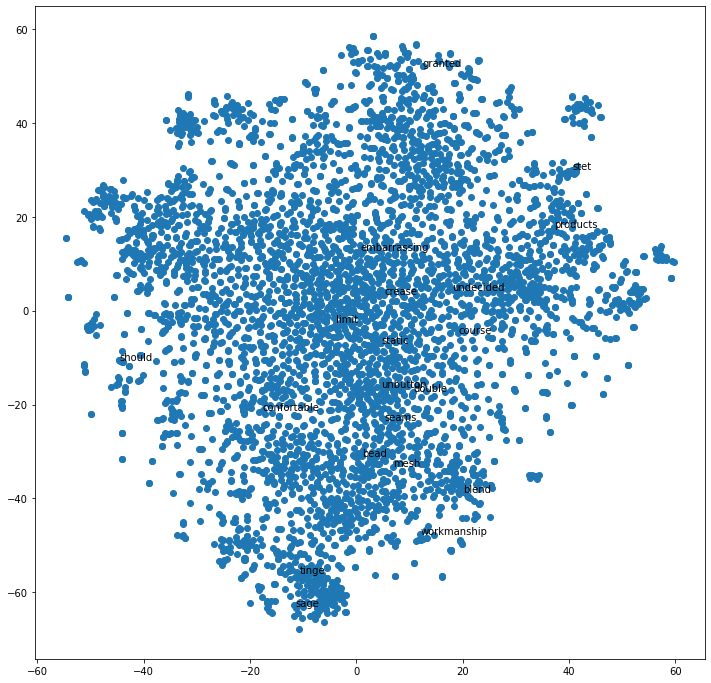

In [48]:
plot_with_matplotlib(x_vals, y_vals, labels)

#### UMAP


In [49]:
import umap
embedding = umap.UMAP(random_state=50).fit_transform(model_50d.wv.vectors)

Text(0.5, 1.0, 'UMAP projection of the 50d Fashion Review Embedding')

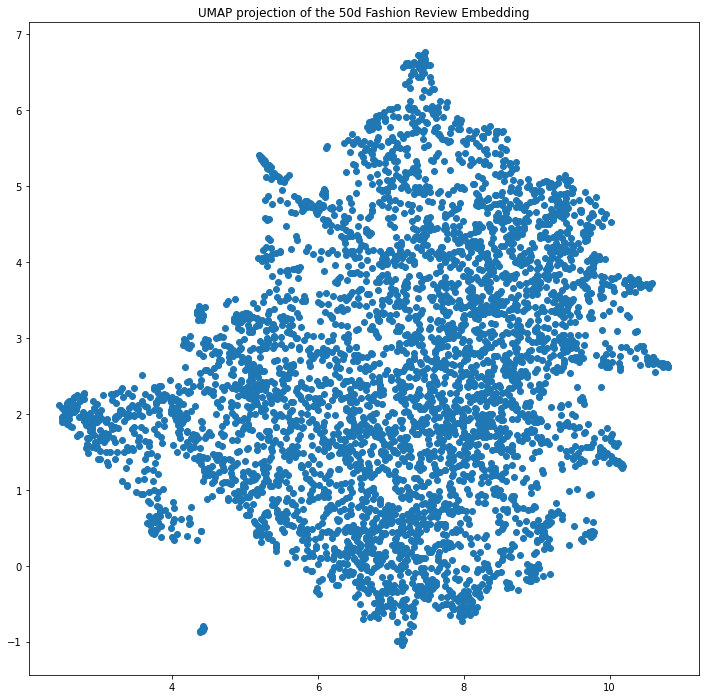

In [50]:
plt.figure(figsize=(12, 12))
plt.scatter(embedding[:, 0], embedding[:, 1])
plt.title('UMAP projection of the 50d Fashion Review Embedding')

Text(0.5, 1.0, 'UMAP projection of the 200d Fashion Review Embedding')

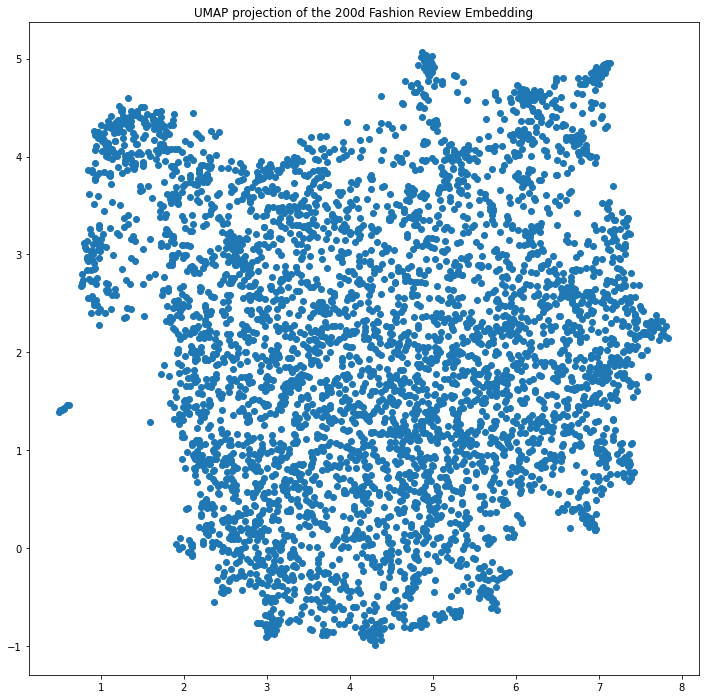

In [51]:
embedding = umap.UMAP(random_state=200).fit_transform(model_200d.wv.vectors)
plt.figure(figsize=(12, 12))
plt.scatter(embedding[:, 0], embedding[:, 1])
plt.title('UMAP projection of the 200d Fashion Review Embedding')

## Future Work: Optimizations to test
- Preprocessing: Does using a more complex tokenizer (i.e. spaCy) improve performance?
- Data: Does adding more data improve performance?
- Parameter Tuning: Does changing the window size / number of dimensions improve performance?
- Algorithm: Could a different implementation (CBOW / GloVE / PMI) improve performance?

## Using Embeddings as inputs to ML Models

### Generating the dataframe

In [52]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model

In [53]:
df.sample(10)

,Title,Review Text,Rating
2550,Lightweight cardigan,This very lightweight cardigan looked like an ...,3
4361,"Love the color & style, but....",I ordered this in the mauve and it's a really ...,3
15404,Love fox head print,This skirt is really pretty in person. my stor...,4
11269,Not as pictured,I was so excited to see this yellow dress onli...,3
9799,Very cute tee,"I ordered an xsp online, which is my usual siz...",5
2496,Sack like,I thought this would be cute with leggings bas...,2
16280,Fabulous pilazzo pants!,These are amazing! wide slits on out seam show...,5
2464,Run large,"I love the idea of ruffles, but this shirt was...",3
10501,Cute summer blouse,This top is really great for the summer. the f...,5
10612,Perfect in plaid!,I couldn't wait to try this on because i love ...,5


In [54]:
df["Rating"].value_counts()

5    10871
4     4289
3     2464
2     1360
1      691
Name: Rating, dtype: int64

In [55]:
df["Sentiment"] = pd.cut(df["Rating"], bins=2, labels=[0, 1])
df.head()

,Title,Review Text,Rating,Sentiment
0,Some major design flaws,I had such high hopes for this dress and reall...,3,0
1,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1
2,Flattering shirt,This shirt is very flattering to all due to th...,5,1
3,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0
4,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1


In [56]:
train_data, test_data = train_test_split(df[["Title", "Sentiment"]], test_size=0.3, random_state=42)

### Generating the workflow


In [57]:
def preprocess_document(document):
  return gensim.utils.tokenize(document, lowercase=True, deacc=True)
  
def word_averaging(wv, words):
    all_words, mean = set(), []
    
    for word in words:
        if isinstance(word, np.ndarray):
            mean.append(word)
        elif word in wv.vocab:
            mean.append(wv.syn0norm[wv.vocab[word].index])
            all_words.add(wv.vocab[word].index)

    if not mean:
        logging.warning("cannot compute similarity with no input %s", words)
        # FIXME: remove these examples in pre-processing
        return np.zeros(wv.vector_size,)

    mean = gensim.matutils.unitvec(np.array(mean).mean(axis=0)).astype(np.float32)
    return mean

def word_averaging_list(wv, text_list):
    return np.vstack([word_averaging(wv, review) for review in text_list])

def evaluate_prediction(predictions, target, title="Confusion matrix"):
    print('accuracy %s' % accuracy_score(target, predictions))
    cm = confusion_matrix(target, predictions)
    print('confusion matrix\n %s' % cm)
    print('(row=expected, col=predicted)')
    
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plot_confusion_matrix(cm_normalized, title + ' Normalized')

def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(2)
    target_names = ["Negative", "Positive"]
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

def predict(vectorizer, classifier, data):
    data_features = vectorizer.transform(data['plot'])
    predictions = classifier.predict(data_features)
    target = data["Sentiment"]
    evaluate_prediction(predictions, target)

In [58]:
test_tokenized = test_data.apply(lambda x: list(preprocess_document(x['Title'])), axis=1).values
train_tokenized = train_data.apply(lambda x: list(preprocess_document(x['Title'])), axis=1).values

### Results

#### Custom Fashion Review Embedding

In [59]:
X_train_word_average_50d = word_averaging_list(model_50d.wv,train_tokenized)
X_test_word_average_50d = word_averaging_list(model_50d.wv,test_tokenized)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `syn0norm` (Attribute will be removed in 4.0.0, use self.wv.vectors_norm instead).
  # This is added back by InteractiveShellApp.init_path()


accuracy 0.8665085549720482
confusion matrix
 [[ 955  408]
 [ 380 4160]]
(row=expected, col=predicted)


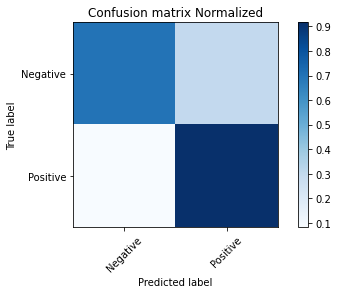

In [60]:
knn_naive = KNeighborsClassifier(n_neighbors=8, n_jobs=1, algorithm='brute', metric='cosine' )
knn_naive.fit(X_train_word_average_50d, train_data["Sentiment"])
predicted = knn_naive.predict(X_test_word_average_50d)
evaluate_prediction(predicted, test_data["Sentiment"])

accuracy 0.8583770963916653
confusion matrix
 [[ 838  525]
 [ 311 4229]]
(row=expected, col=predicted)


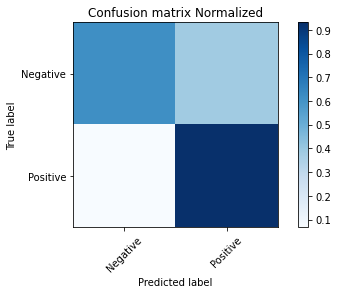

In [61]:
logreg = linear_model.LogisticRegression(n_jobs=1, C=1e5)
logreg = logreg.fit(X_train_word_average_50d, train_data['Sentiment'])
predicted = logreg.predict(X_test_word_average_50d)
evaluate_prediction(predicted, test_data["Sentiment"])

#### Pretrained Wikipedia Embedding

In [62]:
X_train_word_average_wiki = word_averaging_list(wiki_vectors, train_tokenized)
X_test_word_average_wiki = word_averaging_list(wiki_vectors, test_tokenized)

Streaming output truncated to the last 5000 lines.


accuracy 0.7691004573945451
confusion matrix
 [[   0 1363]
 [   0 4540]]
(row=expected, col=predicted)


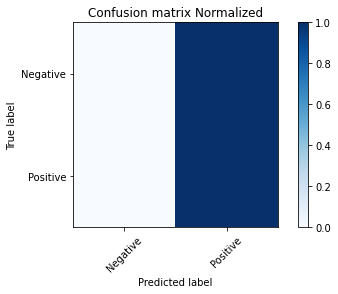

In [66]:
knn_naive = KNeighborsClassifier(n_neighbors=8, n_jobs=1, algorithm='brute', metric='cosine')
knn_naive.fit(X_train_word_average_wiki, train_data["Sentiment"])
predicted = knn_naive.predict(X_test_word_average_wiki)
evaluate_prediction(predicted, test_data["Sentiment"])

#### Pretrained Twitter Embedding

In [64]:
X_train_word_average_twitter = word_averaging_list(twitter_vectors, train_tokenized)
X_test_word_average_twitter = word_averaging_list(twitter_vectors, test_tokenized)

accuracy 0.8414365576825343
confusion matrix
 [[ 911  452]
 [ 484 4056]]
(row=expected, col=predicted)


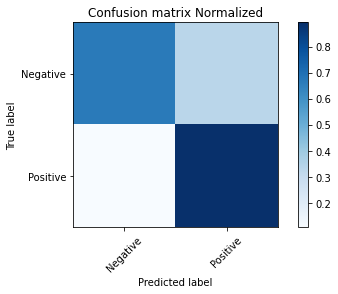

In [67]:
knn_naive = KNeighborsClassifier(n_neighbors=8, n_jobs=1, algorithm='brute', metric='cosine')
knn_naive.fit(X_train_word_average_twitter, train_data["Sentiment"])
predicted = knn_naive.predict(X_test_word_average_twitter)
evaluate_prediction(predicted, test_data["Sentiment"])